In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import requests
from datetime import datetime

In [2]:
sns.set_style("whitegrid")

In [3]:
language='en'

In [4]:
url = 'https://energy-charts.info/charts/power/data_unit/de/year_wind_offshore_unit_2020.json'

In [5]:
s = requests.Session()
r = s.get(url)
    
s.close()

response = json.loads(r.text)

In [6]:
ticks = [datetime.utcfromtimestamp(d/1000) for d in response[0]['xAxisValues']]

In [7]:
data = {}

for r in response:
    data[r['name'][0][language]] = r['data']
    

In [8]:
offshore_prod = pd.DataFrame(data, index=ticks)

In [9]:
offshore_prod_norm = offshore_prod/offshore_prod.max()

<AxesSubplot:ylabel='Frequency'>

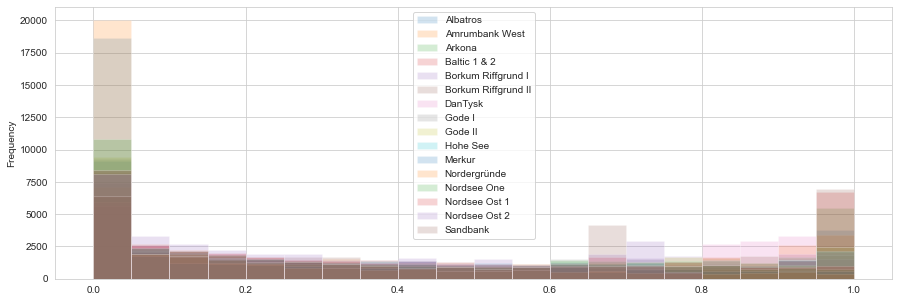

In [10]:
offshore_prod_norm.drop('sum',axis=1).plot.hist(bins=20,
                                                alpha=.2,
                                                figsize=(15,5))

In [29]:
sorted_median_index = offshore_prod_norm.drop('sum',axis=1).median().sort_values().index

<AxesSubplot:>

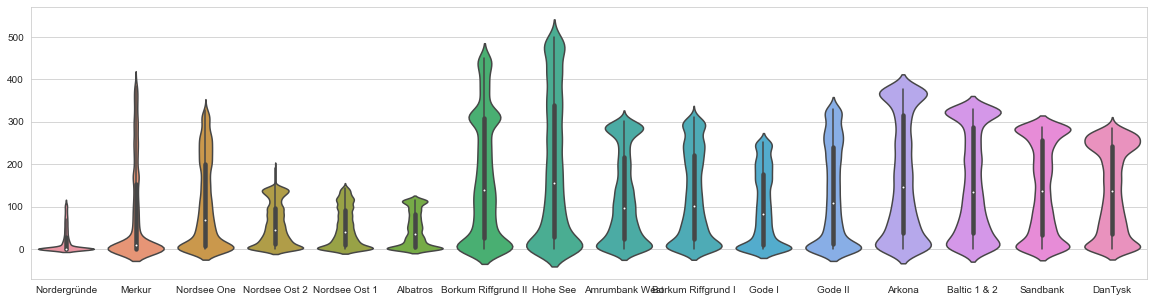

In [30]:
fig, ax = plt.subplots(figsize=(20,5))
sns.violinplot(data=offshore_prod[sorted_median_index],
              ax=ax,
              scale='width')